In [1]:
import keras
%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
#
# 1. Load Data
#
DATAFOLDER = '/home/d/Dropbox/CS410CatsAndDogz/'

In [3]:
train_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
X_train = train_generator.flow_from_directory(DATAFOLDER+'/train', 
                                              color_mode='grayscale', 
                                              target_size=(100,100))

Found 5998 images belonging to 2 classes.


In [4]:
test_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
X_test = test_generator.flow_from_directory(DATAFOLDER+'/test',
                                            color_mode='grayscale',
                                            target_size=(100,100))

Found 2998 images belonging to 2 classes.


In [5]:
first_image = X_train[0][0][0]
first_label = X_train[0][1][0]

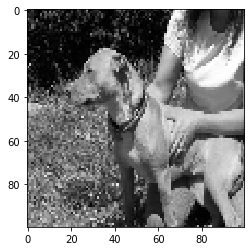

In [6]:
imshow(first_image[:,:,0], cmap='gray')

In [7]:
first_label

array([0., 1.], dtype=float32)

In [8]:
first_image.max()

1.0

In [9]:
first_image.shape

(100, 100, 1)

In [10]:
#
# 2. Setup Network
#

In [11]:
NUMBER_OF_CLASSES = 2

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                             activation='relu',
                             input_shape=first_image.shape))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(NUMBER_OF_CLASSES, activation='softmax'))

In [13]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [14]:
#
# 3. Train Network
#

In [15]:
# model.fit_generator(X_train, epochs=30, steps_per_epoch=32)
model.fit_generator(X_train, epochs=5)

Epoch 1/5
188/188 [==============================] - 23s 120ms/step - loss: 0.6963 - accuracy: 0.5880
Epoch 2/5
188/188 [==============================] - 22s 115ms/step - loss: 0.4930 - accuracy: 0.7768
Epoch 3/5
188/188 [==============================] - 22s 120ms/step - loss: 0.2422 - accuracy: 0.9091
Epoch 4/5
188/188 [==============================] - 22s 116ms/step - loss: 0.0959 - accuracy: 0.9700
Epoch 5/5
188/188 [==============================] - 22s 115ms/step - loss: 0.0445 - accuracy: 0.9883


In [16]:
#
# 4. Predict!
#

In [23]:
prediction = model.predict(X_test[0][0][12:13])

In [24]:
prediction

array([[0.9036203, 0.0963797]], dtype=float32)

In [19]:
np.argmax( prediction )

0

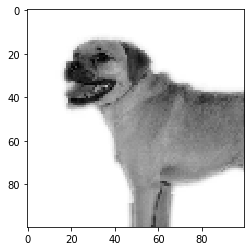

In [26]:
imshow(X_test[0][0][12,:,:,0], cmap='gray')

In [27]:
model.evaluate(X_test)

94/94 [==============================] - 11s 113ms/step


[1.9288901090621948, 0.6661107540130615]

In [22]:
model.metrics_names

['loss', 'accuracy']

In [39]:
#
# Let's try our own image!
#
catdog = keras.preprocessing.image.load_img('/home/d/Dropbox/catdog.png', 
                                            target_size=(100,100),
                                            color_mode = "grayscale")

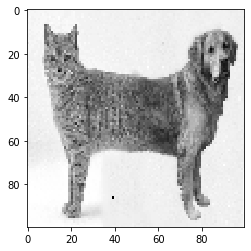

In [40]:
imshow(catdog, cmap='gray')

In [46]:
# convert to numpy array
catdog = np.array(catdog)
catdog = catdog.reshape(1,catdog.shape[0],catdog.shape[1],1)

In [49]:
# predict it!
prediction = model.predict(catdog)

In [50]:
prediction

array([[1., 0.]], dtype=float32)